# implimentation VGG-16 Model

In [1]:
import os
import cv2
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1000)
# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

# Retriving data set from pickle file 

In [2]:
pickle_in = open("E:/com vision/aslalphabet/X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("E:/com vision/aslalphabet/Y_train.pickle","rb")
Y_train = pickle.load(pickle_in)

pickle_in = open("E:/com vision/aslalphabet/X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("E:/com vision/aslalphabet/Y_test.pickle","rb")
Y_test = pickle.load(pickle_in)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

X_train= (5800, 224, 224, 3) Y_train= (5800,)
X_test= (28, 224, 224, 3) Y_test= (28,)


# find the mean value for each channel of train and test data set

In [3]:
# for c in range(3):
#     X_train[:, :, c] = X_train[:, :, c] - mean_img[c]
X_train_r_mean=np.mean(X_train[:, :,1])
print(f"Mean value of x_train red channel{X_train_r_mean}")
X_train_g_mean=np.mean(X_train[:, :,2])
print(f"Mean value of x_train green channel{X_train_g_mean}")
X_train_b_mean=np.mean(X_train[:, :,3])
print(f"Mean value of x_train blue channel{X_train_b_mean}")
X_test_r_mean=np.mean(X_test[:, :,1])
print(f"Mean value of x_test red channel{X_test_r_mean}")
X_test_g_mean=np.mean(X_test[:, :,2])
print(f"Mean value of x_test green channel{X_test_g_mean}")
X_test_b_mean=np.mean(X_test[:, :,3])
print(f"Mean value of x_test blue channel{X_test_b_mean}")
# mean_img = np.mean(X_train, axis=0)
# plt.imshow(mean_img.astype('uint8'))
# print (mean_img)

Mean value of x_train red channel71.63634490966797
Mean value of x_train green channel130.10195922851562
Mean value of x_train blue channel143.77406311035156
Mean value of x_test red channel71.62532043457031
Mean value of x_test green channel130.21157836914062
Mean value of x_test blue channel144.11219787597656


# substrack mean val of each channel from each channel of train and test array 

In [4]:

# X_train_norm= X_train[:, :,1]-X_train_r_mean, X_train[:, :,2]-X_train_g_mean, X_train[:, :,3]-X_train_b_mean
#     mean_pixel = [103.939, 116.779, 123.68]
# img = img.astype(np.float32, copy=False)
for c in range(3):
    if(c==1):
        X_train[:, :, c] = X_train[:, :, c] - X_train_r_mean
    elif(c==2):
         X_train[:, :, c] = X_train[:, :, c] - X_train_g_mean
    else:
         X_train[:, :, c] = X_train[:, :, c] - X_train_b_mean
for c in range(3):
    if(c==1):
        X_test[:, :, c] = X_test[:, :, c] - X_test_r_mean
    elif(c==2):
         X_test[:, :, c] = X_test[:, :, c] - X_test_g_mean
    else:
         X_test[:, :, c] = X_test[:, :, c] - X_test_b_mean

# X_train = X_train.transpose((2,0,1))
# X_train = np.expand_dims(X_train, axis=0)

# plot the preprocessed img 

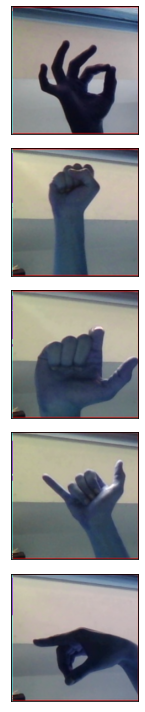

(5800, 224, 224, 3)


In [5]:
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    

    c += 2
    
plt.tight_layout()
plt.show()
print (X_train.shape)

# impleminting the vgg 16 model

The input to the network is image of dimensions (224, 224, 3). The first two layers have 64 channels of 3*3 filter size and same padding. Then after a max pool layer of stride (2, 2), two layers which have convolution layers of 256 filter size and filter size (3, 3). This followed by a max pooling layer of stride (2, 2) which is same as previous layer. Then there are 2 convolution layers of filter size (3, 3) and 256 filter. After that there are 2 sets of 3 convolution layer and a max pool layer. Each have 512 filters of (3, 3) size with same padding.This image is then passed to the stack of two convolution layers. In these convolution and max pooling layers, the filters we use is of the size 3*3

After the stack of convolution and max-pooling layer, we got a (7, 7, 512) feature map. We flatten this output to make it a (1, 25088) feature vector.After this there are 3 fully connected layer, the first layer takes input from the last feature vector and outputs a (1, 4096) vector, second layer also outputs a vector of size (1, 4096) but the third layer output a 1000 channels for 1000 classes of ILSVRC challenge, then after the output of 3rd fully connected layer is passed to softmax layer in order to normalize the classification vector. After the output of classification vector top-5 categories for evaluation. All the hidden layers use ReLU as its activation function. ReLU is more computationally efficient because it results in faster learning and it also decreases the likelihood of vanishing gradient problem.

In [6]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=X_train.shape[1:]),
    
    layers.ZeroPadding2D(padding=(1, 1)),
    layers.Conv2D(filters=64, kernel_size=(3,3),padding="valid"),
    layers.Activation('relu'),
    layers.ZeroPadding2D(padding=(1, 1)),
    layers.Conv2D(filters=64, kernel_size=(3,3),padding="valid"),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.ZeroPadding2D(padding=(1, 1)),
    layers.Conv2D(filters=128, kernel_size=(3,3), padding='valid'),
    layers.ZeroPadding2D(padding=(1, 1)),
    layers.Conv2D(filters=128, kernel_size=(3,3), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.ZeroPadding2D(padding=(1, 1)),
    layers.Conv2D(filters=256, kernel_size=(3,3), padding='valid'),
    layers.Activation('relu'),
    layers.ZeroPadding2D(padding=(1, 1)),
    layers.Conv2D(filters=256, kernel_size=(3,3), padding='valid'),
    layers.Activation('relu'),
    layers.ZeroPadding2D(padding=(1, 1)),
    layers.Conv2D(filters=256, kernel_size=(3,3),padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.ZeroPadding2D(padding=(1, 1)),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding='valid'),
    layers.Activation('relu'),
    layers.ZeroPadding2D(padding=(1, 1)),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding='valid'),
    layers.Activation('relu'),
    layers.ZeroPadding2D(padding=(1, 1)),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.ZeroPadding2D(padding=(1, 1)),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding='valid'),
    layers.Activation('relu'),
    layers.ZeroPadding2D(padding=(1, 1)),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding='valid'),
    layers.Activation('relu'),
    layers.ZeroPadding2D(padding=(1, 1)),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(30),
    layers.Activation('softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 224, 224, 64)      0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0

# Compile the moddel with optimizer adam

In [7]:
model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

# fit the dataset with the model and train the model

In [ ]:
h = model.fit(x=X_train, y=Y_train, epochs=10,validation_split=0.2 , batch_size=32)

# plot the validation accuracy and the validation error also see the training accuracy and error

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--', label='train accuracy')
plt.plot(h.history['val_accuracy'], '--', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--', label='train loss')
plt.plot(h.history['val_loss'], '--', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

# Evaluate the model with test dataset

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)